In [3]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

from scipy import signal

## Impulse response for IEC Type II PPM

In [4]:
xtarget = np.array([0.5, 1.5, 5.0, 10.0, 100.0]) * 1e-03
ytarget_db = np.array([-17.0, -9.0, -4.0, -2.0, 0.0])
ytarget = np.power(10, ytarget_db / 20.0)

In [5]:
fs = 48000
freq = 2000

t = np.arange(0, int(0.100*fs)) #100ms
sine = np.sin(2.0 * np.pi * freq * t / fs)
sig01 = np.append(np.append(np.zeros(int(0.010*fs)), sine), np.zeros_like(sine) )
tim01 = np.linspace(0.0, 0.210, int(0.210*fs))

sig02 = np.abs(sig01)

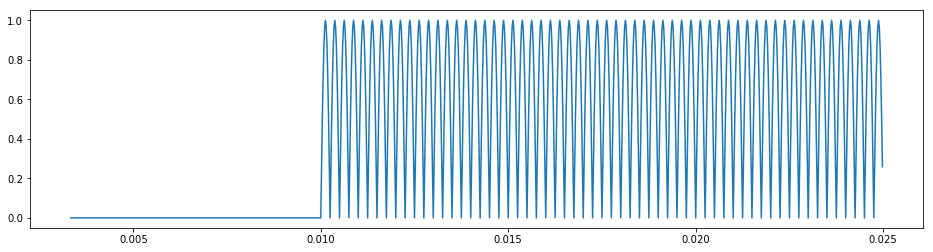

In [6]:
plt.figure(figsize=(16, 4))
plt.plot(tim01[160:1200], sig02[160:1200])
plt.show()

## Good compromise -- release time faster than PPM

In [7]:
%%time
filt01 = np.zeros_like(sig01)
filt02 = np.zeros_like(sig01)
rel = 1.0 - 4.8 / fs
a1 = 200.0 / fs #210
a2 = 920.0 / fs #1100  960
alpha = 0.60 #0.6666
y1, y2 = 0.0, 0.0
t = 0

for i, x in np.ndenumerate(sig02):
    y1 = rel * y1
    y2 = rel * y2
    if x > y1:
        y1 += a1 * (x - y1)
    if x > y2: 
        y2 += a2 * (x - y2)
    filt01[i] = y1
    filt02[i] = y2

res = alpha * filt01 + (1 - alpha) * filt02

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 8.82 ms


In [8]:
gain = np.max(res)
gain

0.917924211394875

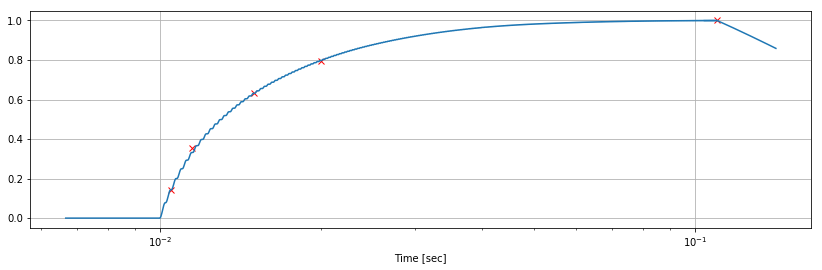

In [9]:
#gain = 0.9215838347691006
plt.figure(figsize=[14,4])
plt.plot(xtarget + 0.01, ytarget, 'rx')
plt.plot(tim01[320:6800], res[320:6800] / gain)
plt.xlabel('Time [sec]'); plt.xscale('log'); plt.grid()
plt.show()

In [10]:
xtest = xtarget + 0.01
resdb = 20 * np.log10(res[(xtest * fs).astype(int)]) - 20 * np.log10(gain)
resdb - ytarget_db

array([ 0.15008564, -0.58445355,  0.00335348,  0.03628826, -0.00434316])

In [11]:
xtest = xtarget + 0.01
resdb = 20 * np.log10(res[(xtest * fs).astype(int)]) - 20 * np.log10(gain)
resdb - ytarget_db

array([ 0.15008564, -0.58445355,  0.00335348,  0.03628826, -0.00434316])

## TODO: optimiser

In [ ]:
def process(a1, a2, alpha):
    filt01 = np.zeros_like(sig01)
    filt02 = np.zeros_like(sig01)
    rel = 0.99985 #slower release
    a1 = 200.0 / fs #210
    a2 = 920.0 / fs #1100  960
    alpha = 0.60 #0.6666  0.60
    y1, y2 = 0.0, 0.0
    t = 0

    for i, x in np.ndenumerate(sig02):
        y1 = rel * y1
        y2 = rel * y2
        if x > y1:
            y1 += a1 * (x - y1)
        if x > y2: 
            y2 += a2 * (x - y2)
        filt01[i] = y1
        filt02[i] = y2

    res = alpha * filt01 + (1 - alpha) * filt02
    gain = np.max(res)
    # critical values
    

## JMeter algorithm

In [12]:
# release 24db in 2.8s
reldbps = 24 / 2.8
reldbsamp = 24 / (2.8 * 32000)
10 ** (-reldbsamp / 20)

0.9999691622822825

In [13]:
%%time
filt01 = np.zeros_like(sig01)
filt02 = np.zeros_like(sig01)
rel = 0.99875 #
a1 = 0.0060 #14Hz
a2 = 0.0355 #80Hz
y1, y2 = 0.0, 0.0
t = 0

for i, x in np.ndenumerate(sig02):
    if t > 4:
        y1 = rel * y1
        y2 = rel * y2
        t = 0
    if x > y1:
        y1 += a1 * (x - y1)
    if x > y2: 
        y2 += a2 * (x - y2)
    filt01[i] = y1
    filt02[i] = y2
    t += 1
alpha = 0.6666
res = alpha * filt01 + (1-alpha) * filt02

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 14.2 ms


In [14]:
gain = np.max(res)
gain

0.8838965146555127

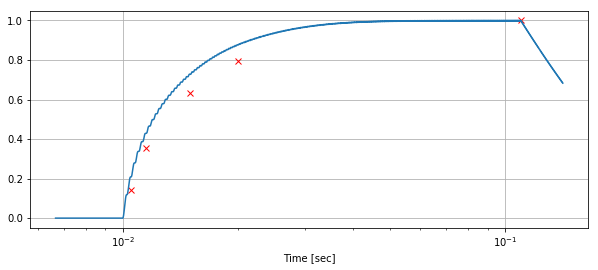

In [15]:
#gain = 0.9197849694819198
plt.figure(figsize=[10,4])
plt.plot(xtarget + 0.01, ytarget, 'rx')
plt.plot(tim01[320:6800], res[320:6800] / gain)
plt.xlabel('Time [sec]'); plt.xscale('log'); plt.grid()
plt.show()

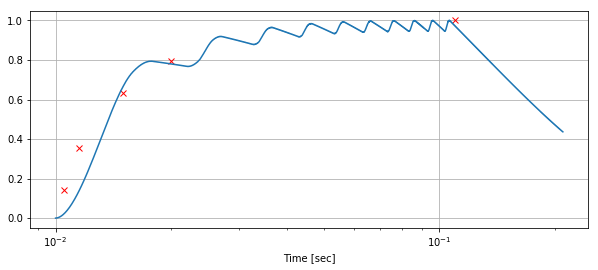

In [681]:
#gain = 0.9197849694819198
plt.figure(figsize=[10,4])
plt.plot(xtarget + 0.01, ytarget, 'rx')
plt.plot(tim01[320:6800], res[320:6800] / gain)
plt.xlabel('Time [sec]'); plt.xscale('log'); plt.grid()
plt.show()